In [1]:
print("Hello, Thason!")

Hello, Thason!


In [2]:
import pandas as pd
import sklearn
import numpy as np

# Libraries for data visualisation
import matplotlib.pyplot as plt

# load dataset
housing = pd.read_csv('housing.csv')

# Drops the seller ID column, which is not necessary for our analysis
housing = housing.drop(['sellerId'], axis=1)

housing.head()


,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude
0,3626025,"11 Chestnut Crescent, Bridgemount, Carrigaline...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,...,Roy Dennehy,Dennehy Auctioneers,BRANDED_AGENT,16.0,False,False,False,C2,-8.382500,51.822940
1,3675175,"58 The Glen, Kilnacourt Woods, Portarlington, ...",featured,2022-01-28,225000,3,2,Semi-D,93.0,Buy,...,Marie Kiernan,Tom McDonald & Associates,BRANDED_AGENT,33.0,False,False,False,C1,-7.177098,53.157465
2,3673450,"16 Dodderbrook Park, Ballycullen, Dublin 24",featured,2022-01-27,575000,4,3,Semi-D,162.0,Buy,...,Moovingo,Moovingo,BRANDED_AGENT,38.0,False,True,False,A3,-6.342763,53.269493
3,3649708,"31 Lissanalta Drive, Dooradoyle, Co. Limerick",featured,2022-01-28,299000,3,3,Semi-D,NaN,Buy,...,DNG Cusack Dunne,DNG Cusack Dunne,BRANDED_AGENT,22.0,False,False,False,C2,-8.640716,52.629588
4,3643947,"5 Columba Terrace, Kells, Co. Meath",featured,2022-01-28,120000,3,1,Terrace,68.0,Buy,...,REA T&J Gavigan,REA T & J Gavigan,BRANDED_AGENT,5.0,False,False,False,G,-6.879797,53.728601


In [13]:
# Instantiates max and min values for attributes
max_bedrooms = 8
min_bedrooms = 1

max_bathrooms = 8
min_bathrooms = 1

max_longitude = 0
min_longitude = -30

max_latitude = 56
min_latitude = 39

max_price = 1000000
min_price = 50000

In [14]:
housing.describe()

,id,price,numBedrooms,numBathrooms,propertySize,AMV_price,m_totalImages,longitude,latitude
count,3.874000e+03,3874.000000,3874.000000,3874.000000,3524.000000,3874.000000,3874.000000,3874.000000,3874.000000
mean,3.630777e+06,311479.980382,3.086474,2.034331,129.228434,0.048529,18.419721,-7.386425,53.135181
std,2.448000e+05,170047.763584,1.154480,1.063008,296.887943,0.214908,10.484710,1.880231,0.714285
min,1.092100e+04,20000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-100.445882,39.783730
25%,3.654312e+06,195000.000000,2.000000,1.000000,77.000000,0.000000,12.000000,-8.427413,52.667973
50%,3.673800e+06,275000.000000,3.000000,2.000000,102.000000,0.000000,17.000000,-7.023064,53.303317
75%,3.686029e+06,380000.000000,4.000000,3.000000,134.000000,0.000000,23.000000,-6.298375,53.437243
max,3.695402e+06,1000000.000000,16.000000,13.000000,8600.000000,1.000000,104.000000,-6.028016,55.299693


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3874 entries, 0 to 3966
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3874 non-null   int64  
 1   title             3874 non-null   object 
 2   featuredLevel     3874 non-null   object 
 3   publishDate       3874 non-null   object 
 4   price             3874 non-null   int64  
 5   numBedrooms       3874 non-null   int64  
 6   numBathrooms      3874 non-null   int64  
 7   propertyType      3874 non-null   object 
 8   propertySize      3524 non-null   float64
 9   category          3874 non-null   object 
 10  AMV_price         3874 non-null   int64  
 11  seller_name       3874 non-null   object 
 12  seller_branch     3874 non-null   object 
 13  sellerType        3874 non-null   object 
 14  m_totalImages     3874 non-null   float64
 15  m_hasVideo        3874 non-null   bool   
 16  m_hasVirtualTour  3874 non-null   bool   


In [16]:
# Removes all houses where the value is greater than the maximum price threshold
housing.drop(housing[housing.price > max_price].index, inplace=True)

In [17]:
# Removes all houses above the specified max number of bathrooms threshold
housing.drop(housing[housing.numBathrooms > max_bathrooms].index, inplace=True)

In [18]:
# Removes all houses above the specified max number of bedrooms threshold
housing.drop(housing[housing.numBedrooms > max_bedrooms].index, inplace=True)

In [19]:
# Removes all houses outside the specified longitude range
housing.drop(housing[(housing.longitude > max_longitude) | (housing.longitude < min_longitude)].index, inplace=True)

In [20]:
# Removes all houses outside the specified latitude range
housing.drop(housing[(housing.latitude > max_latitude) | (housing.latitude < min_latitude)].index, inplace=True)

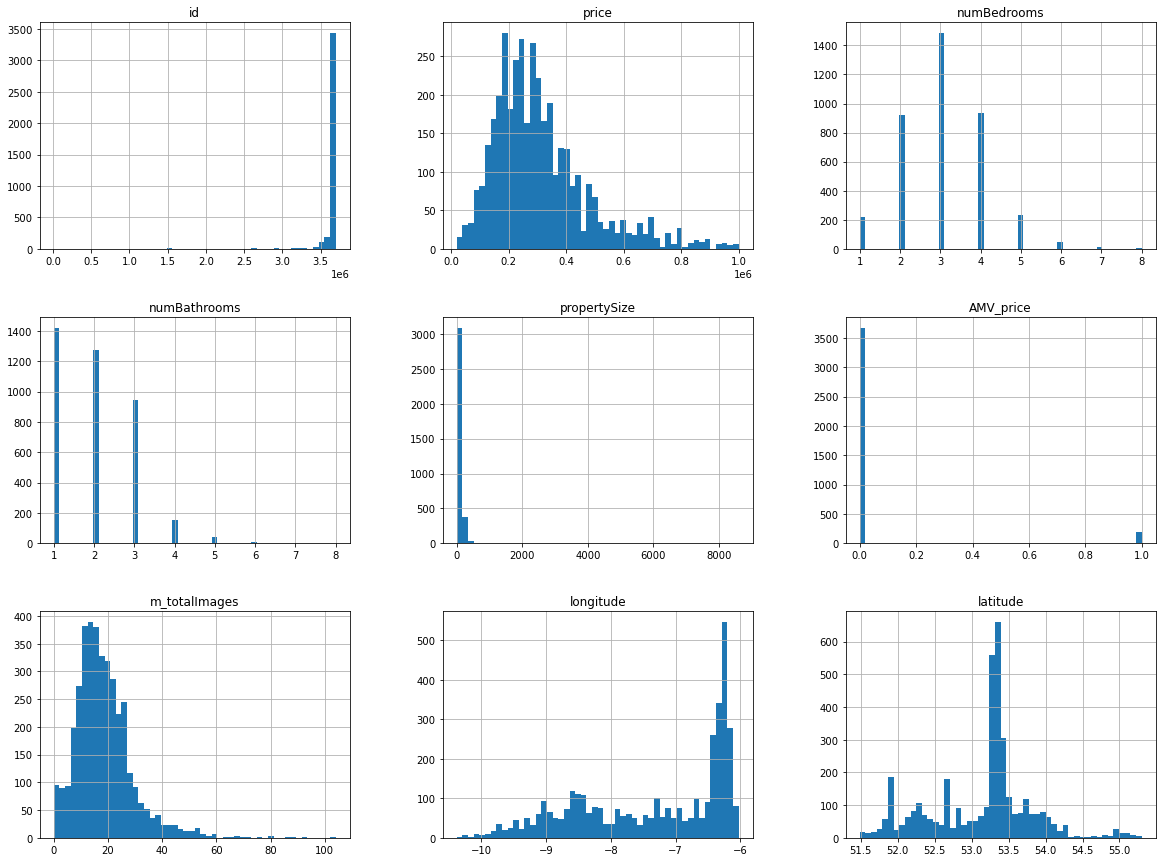

In [21]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

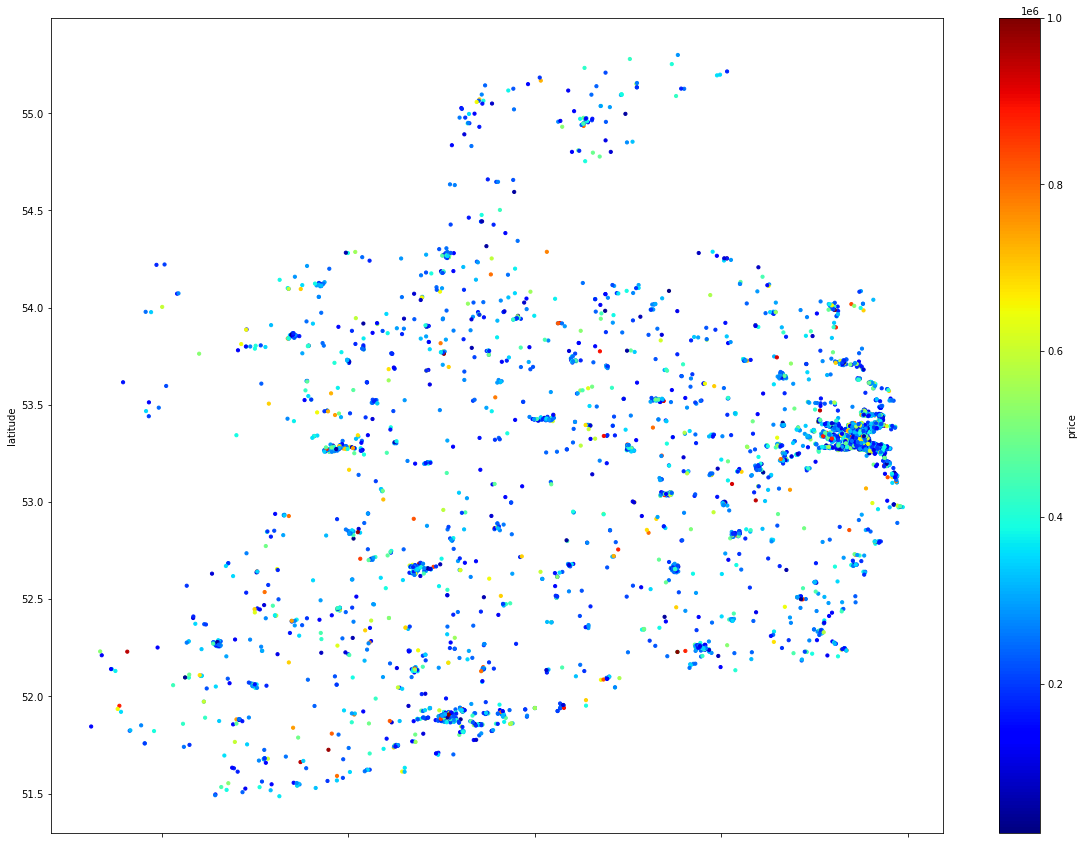

In [28]:
housing.plot(kind='scatter', x='longitude', y='latitude', c="price", cmap=plt.get_cmap('jet'), colorbar=True, figsize=(20, 15), s=10)


In [29]:
corr_matrix = housing.corr()

In [30]:
corr_matrix['price'].sort_values(ascending=False)

price               1.000000
numBathrooms        0.353733
numBedrooms         0.334422
propertySize        0.033837
m_hasVirtualTour    0.011043
m_hasBrochure       0.006100
m_hasVideo         -0.017895
longitude          -0.019486
latitude           -0.027395
m_totalImages      -0.033907
id                 -0.070271
AMV_price          -0.185198
Name: price, dtype: float64

In [31]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='numBathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='numBedrooms', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='numBathrooms'>,
        <AxesSubplot:xlabel='numBathrooms', ylabel='numBathrooms'>,
        <AxesSubplot:xlabel='numBedrooms', ylabel='numBathrooms'>],
       [<AxesSubplot:xlabel='price', ylabel='numBedrooms'>,
        <AxesSubplot:xlabel='numBathrooms', ylabel='numBedrooms'>,
        <AxesSubplot:xlabel='numBedrooms', ylabel='numBedrooms'>]],
      dtype=object)

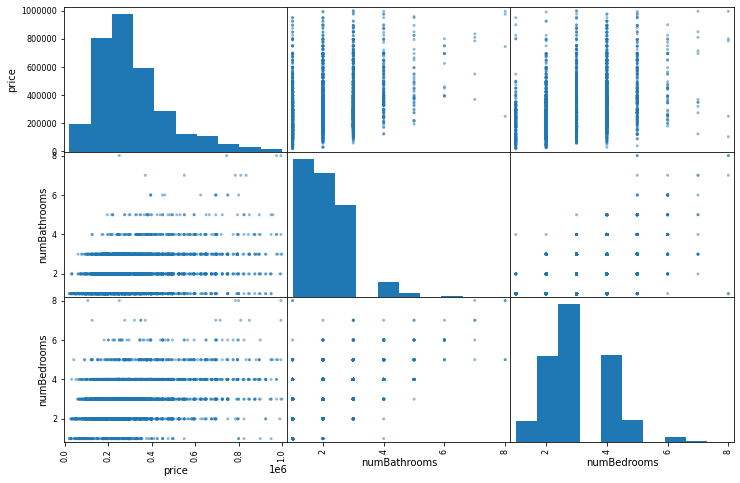

In [32]:
attributes = ['price', 'numBathrooms', 'numBedrooms']
scatter_matrix(housing[attributes], figsize=(12, 8))